<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [61]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize': (20, 40)})

# import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

%matplotlib inline

In [62]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("dat/housing.data", header=None, names=names, delim_whitespace=True)

In [63]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [64]:
# Shape
data.shape

(506, 14)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


##### 1. Plot Histogram of `RM`

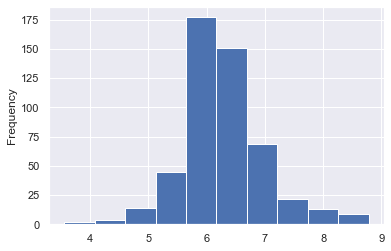

In [67]:
#  ANSWER
AGE = data['RM']
AGE.plot(kind='hist');

##### 2. Plot Histogram of `MEDV`

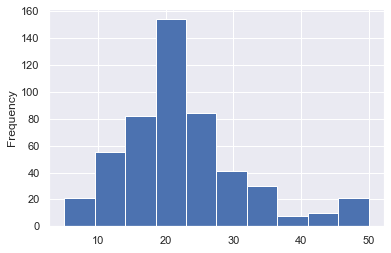

In [68]:
MEDV = data['MEDV']
MEDV.plot(kind='hist');

##### 3.A Draw Scatter Plot of `AGE` & `MEDV`

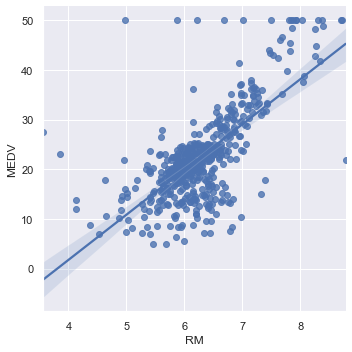

In [69]:
# ANSWER
sns.lmplot(x="RM", y="MEDV", data=data);

In [70]:
data['RM'].mean()

6.284634387351787

##### 3.B Is there any trend? State your observation.

**ANSWER:**: There is a positove correlation between `RM` & `MEDV`. 

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [71]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [72]:
medv_over_6 = data[data['RM'] > 6]
medv_over_6.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,2.534904,14.944444,9.780751,0.072072,0.536345,6.627529,64.597297,4.068369,8.981982,389.570571,18.130631,361.778529,10.178829,25.164264
std,6.524536,25.969266,6.554317,0.258996,0.111307,0.561271,28.754451,2.102525,8.394973,162.124131,2.208927,86.890626,5.703225,9.486342
min,0.006320,0.000000,0.460000,0.000000,0.385000,6.003000,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,7.200000
25%,0.060760,0.000000,3.970000,0.000000,0.442000,6.211000,38.500000,2.295500,4.000000,273.000000,16.600000,378.380000,5.700000,19.400000
50%,0.170040,0.000000,7.380000,0.000000,0.507000,6.454000,71.600000,3.495200,5.000000,307.000000,18.400000,391.990000,8.670000,23.300000
75%,1.833770,22.000000,18.100000,0.000000,0.614000,6.854000,91.100000,5.491700,8.000000,437.000000,20.200000,395.750000,13.440000,29.800000
max,88.976200,100.000000,25.650000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,666.000000,21.200000,396.900000,29.050000,50.000000


In [73]:
medv_over_6.sample(100).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.924584,14.120000,10.034300,0.040000,0.536499,6.557860,63.226000,4.158542,9.080000,392.820000,18.346000,350.576300,10.990400,23.451000
std,5.894065,26.145969,6.261626,0.196946,0.111332,0.528712,29.508826,2.089888,8.570186,163.088709,2.139216,97.848951,6.175206,9.734968
min,0.014390,0.000000,1.470000,0.000000,0.385000,6.006000,2.900000,1.344900,1.000000,193.000000,12.600000,18.820000,1.920000,7.200000
25%,0.050763,0.000000,4.945000,0.000000,0.437675,6.179500,37.125000,2.194750,4.000000,276.750000,16.875000,373.265000,6.360000,16.475000
50%,0.165995,0.000000,7.625000,0.000000,0.508500,6.421500,69.750000,3.715650,5.000000,320.000000,18.700000,390.365000,9.220000,22.550000
75%,2.238643,22.000000,18.100000,0.000000,0.609750,6.746750,93.075000,5.778300,8.000000,433.250000,20.200000,395.810000,16.270000,27.425000
max,37.661900,95.000000,21.890000,1.000000,0.770000,8.375000,100.000000,9.089200,24.000000,666.000000,21.200000,396.900000,29.050000,50.000000


In [74]:
# ANSWER
N = 100
medv_over_6 = data[data['RM'] > 6]['MEDV'].sample(N)
medv_under_6 = data[data['RM'] <= 6]['MEDV'].sample(N)

In [75]:
medv_over_6.describe()

count    100.000000
mean      26.063000
std        9.376908
min        9.500000
25%       21.150000
50%       23.700000
75%       30.400000
max       50.000000
Name: MEDV, dtype: float64

In [76]:
medv_under_6.describe()

count    100.000000
mean      17.745000
std        6.833391
min        5.000000
25%       14.475000
50%       18.350000
75%       20.600000
max       50.000000
Name: MEDV, dtype: float64

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

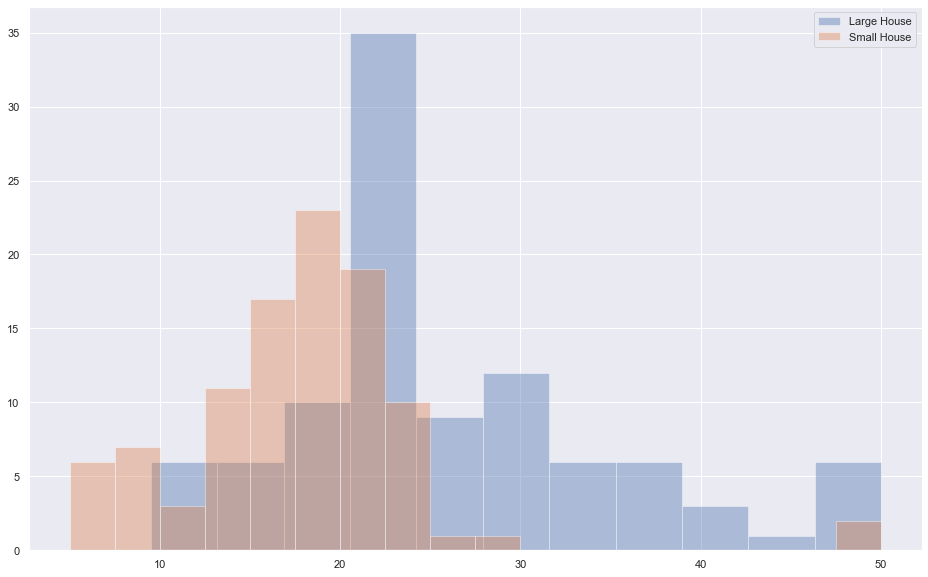

In [78]:
# ANSWER
fig, ax = plt.subplots(figsize=(16,10))

ax = sns.distplot(medv_over_6, label='Large House', kde=False);
ax = sns.distplot(medv_under_6, label='Small House', kde=False, ax=ax);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show();



##### 7. Calculate Variance

Calculate variance for both samples.

In [25]:
# ANSWER
var_medv_over_6 = medv_over_6.var()
print(var_medv_over_6)
var_medv_under_6 = medv_under_6.var()
print(var_medv_under_6)

103.86393030303029
41.374763636363625


In [29]:
# ddof should be 1
print('variance of houses over 6 rooms:', np.var(medv_over_6, ddof=1))
print('variance of houses 6 rooms & under:', np.var(medv_under_6, ddof=1))

variance of houses over 6 rooms: 103.86393030303029
variance of houses 6 rooms & under: 41.374763636363625


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [30]:
# ANSWER
std = np.sqrt((var_medv_over_6 + var_medv_under_6) / 2)
print('std dev:', std)

std dev: 8.52169859650627


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [31]:
# ANSWER
t = (medv_over_6.mean() - medv_under_6.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('t:', t)

t: 5.907147639944502


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [32]:
# ANSWER
df = 2 * N - 2
df

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [33]:
# ANSWER
p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t 
print("t = " + str(t))
print("p = " + str(2 * p))

t = 5.907147639944502
p = 1.495591117617323e-08


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [34]:
# ANSWER
# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': "House price does not increase for large house."
    , 'H1': "House price increases for large house."
}

In [35]:
# ANSWER
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [36]:
# ANSWER
print("t = " + str(t))
print("p = " + str(p*2))
print_sig(p*2, alpha)

t = 5.907147639944502
p = 1.495591117617323e-08
We reject our null hypothesis.
House price increases for large house.


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [37]:
# ANSWER
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    
    Returns:
    Significance message
    '''
    
    str_result = ''
    
    if p_value < alpha:
        str_result = "We reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    elif p_value > alpha:
        str_result = "We fail to reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    else:
        str_result = "Our test is inconclusive."
    
    return str_result

In [38]:
# ANSWER
def ttest_ind(a, b, alpha=0.05):
    '''
    a, b: The arrays must have the same shape
    alpha: value of alpha
    '''
    N = len(a)
    
    # Calculate Variance
    var_a = a.var()
    var_b = b.var()
    
    # Calculate Standard Deviation     
    std = np.sqrt((var_a + var_b) / 2)
    
    # Calculate t-stat    
    t = (a.mean() - b.mean()) / (std * np.sqrt(2 / N))  # t-statistic
    
    # Calculate degree of freedom     
    df = 2 * N - 2
    
    # Calculate p-value
    p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
    # Two-tail     
    p = p * 2
    
    return t, p, check_sig(p, alpha)

In [39]:
# ANSWER
t, p, sig = ttest_ind(medv_over_6, medv_under_6, alpha)
print("t = " + str(t))
print("p = " + str(p))
print(sig)

t = 5.907147639944502
p = 1.495591117617323e-08
We reject our null hypothesis.
House price increases for large house.


#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [40]:
# ANSWER
t2, p2 = stats.ttest_ind(medv_over_6, medv_under_6)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

t = 5.907147639944492
p = 1.4955911134443058e-08
We reject our null hypothesis.
House price increases for large house.




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



